# Exploración redes neuronales con scikit-learn

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates


# Modelado y validación
from sklearn.model_selection import (
    train_test_split,   
    StratifiedKFold,    
    GridSearchCV     
)

# Red neuronal
from sklearn.neural_network import MLPClassifier     

# Métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score
)

# Preprocesamiento
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
        



# Configuración visual
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Cargar dataset
df = pd.read_csv('../data/processed/diabetes_sample.csv')
print("Tamaño del dataset:", df.shape)
df.head()

Tamaño del dataset: (38052, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0
1,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0,0.0,7.0,5.0,8.0
2,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
3,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
4,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,6.0,8.0


In [2]:
target_col = 'Diabetes_012'
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y
)

print("Distribución de clases en train:\n", y_train.value_counts())

Distribución de clases en train:
 Diabetes_012
0.0    25643
2.0     4242
1.0      556
Name: count, dtype: int64


In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test) 

In [4]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

model = MLPClassifier(
    max_iter=500,        
    random_state=2,
    early_stopping=True  
)

params = model.get_params()
print("\nParámetros del modelo MLP:")
for param, valor in sorted(params.items()):
    print(f"{param:25s} = {valor}")


Parámetros del modelo MLP:
activation                = relu
alpha                     = 0.0001
batch_size                = auto
beta_1                    = 0.9
beta_2                    = 0.999
early_stopping            = True
epsilon                   = 1e-08
hidden_layer_sizes        = (100,)
learning_rate             = constant
learning_rate_init        = 0.001
max_fun                   = 15000
max_iter                  = 500
momentum                  = 0.9
n_iter_no_change          = 10
nesterovs_momentum        = True
power_t                   = 0.5
random_state              = 2
shuffle                   = True
solver                    = adam
tol                       = 0.0001
validation_fraction       = 0.1
verbose                   = False
warm_start                = False


In [5]:
param_grid_mlp = {
    'hidden_layer_sizes': [
        (64,), (128,), (64,64),      
        (128,64,32),                 
        (32,16,8)                    
    ],
    'activation': ['relu', 'tanh'],   
    'solver': ['adam'],              
    'alpha': [0.0001, 0.001],         
    'learning_rate_init': [0.001, 0.01]  
}

grid_search_mlp = GridSearchCV(
    estimator=model,
    param_grid=param_grid_mlp,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_search_mlp.fit(X_train_scaled, y_train)

,estimator,MLPClassifier...andom_state=2)
,param_grid,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001], 'hidden_layer_sizes': [(64,), (128,), ...], 'learning_rate_init': [0.001, 0.01], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,hidden_layer_sizes,"(128, ...)"


In [6]:
print("\nMejores parámetros encontrados:", grid_search_mlp.best_params_)

best_model_mlp = grid_search_mlp.best_estimator_
print("\nMejor modelo entrenado:\n", best_model_mlp)


Mejores parámetros encontrados: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.01, 'solver': 'adam'}

Mejor modelo entrenado:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              learning_rate_init=0.01, max_iter=500, random_state=2)


In [7]:
results = pd.DataFrame(grid_search_mlp.cv_results_)

# Seleccionar columnas relevantes para MLP
columns_target = [
    'param_hidden_layer_sizes',
    'param_activation',
    'param_alpha',
    'param_learning_rate_init',
    'param_solver',
    'mean_train_score',
    'std_train_score',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

# Subset ordenado por el ranking del score
results_subset = results[columns_target].copy()
results_subset = results_subset.sort_values(by='rank_test_score')

print("\nResultados resumidos de la búsqueda ordenados por score:")
print(results_subset.to_string(index=False))


Resultados resumidos de la búsqueda ordenados por score:
param_hidden_layer_sizes param_activation  param_alpha  param_learning_rate_init param_solver  mean_train_score  std_train_score  mean_test_score  std_test_score  rank_test_score
           (128, 64, 32)             relu       0.0001                     0.010         adam          0.399021         0.008797         0.389275        0.009413                1
           (128, 64, 32)             relu       0.0010                     0.010         adam          0.401461         0.018845         0.388401        0.017454                2
           (128, 64, 32)             tanh       0.0010                     0.010         adam          0.394282         0.015667         0.387901        0.009492                3
                   (64,)             tanh       0.0001                     0.001         adam          0.391414         0.010603         0.387501        0.011197                4
                   (64,)             tanh      

In [8]:
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)
best_index = grid_search_mlp.best_index_
best_row = results_mlp.loc[best_index]

# Extraer los puntajes de entrenamiento y validación
mean_cv_score = best_row['mean_test_score']
mean_train_score = best_row['mean_train_score']

# Calcular el gap de overfitting
overfitting_gap = mean_train_score - mean_cv_score

print(f"Gap (Train - CV): {overfitting_gap:.4f}")

# Interpretación del gap
if overfitting_gap > 0.05:  # Umbral de ejemplo, ajustable
    print("Posible Overfitting: El modelo funciona mucho mejor en entrenamiento que en validación.")
elif overfitting_gap < 0.01:
    print("Generalización Sólida: El rendimiento de entrenamiento y validación es muy similar.")
else:
    print("Generalización Aceptable: Existe una pequeña diferencia, típica en el modelado.")


Gap (Train - CV): 0.0097
Generalización Sólida: El rendimiento de entrenamiento y validación es muy similar.


Accuracy: 0.853501510970963
Balanced Accuracy: 0.3880962189605182
Precision (macro): 0.49179388207991703
F1-score (macro): 0.399721259623641
Recall (macro): 0.3880962189605182

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0     0.8639    0.9832    0.9197      6412
         1.0     0.0000    0.0000    0.0000       139
         2.0     0.6115    0.1811    0.2795      1060

    accuracy                         0.8535      7611
   macro avg     0.4918    0.3881    0.3997      7611
weighted avg     0.8130    0.8535    0.8137      7611



c:\Users\Usuario\Desktop\Diabetes-Health-Indicators-predictions\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Desktop\Diabetes-Health-Indicators-predictions\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Desktop\Diabetes-Health-Indicators-predictions\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

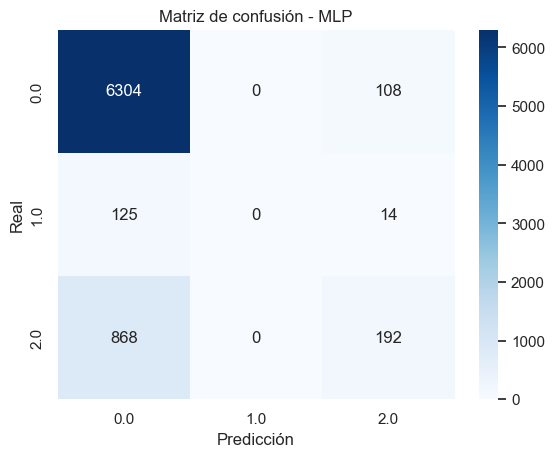

In [9]:
y_pred = best_model_mlp.predict(X_test_scaled)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))

print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt='d', cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - MLP")
plt.show()

In [10]:
# Mejor score de validación cruzada para MLP
cv_ba = grid_search_mlp.best_score_

# Balanced Accuracy en entrenamiento (usando el dataset balanceado y escalado)
y_pred_train = best_model_mlp.predict(X_train_scaled)
ba_train = balanced_accuracy_score(y_train, y_pred_train)

# Balanced Accuracy en prueba
y_pred_test = best_model_mlp.predict(X_test_scaled)
ba_test = balanced_accuracy_score(y_test, y_pred_test)

# Comparativa final
print("\n--- Balanced Accuracy (BA) Comparativa Final ---")
print(f"Train (Balanced): BA = {ba_train:.4f}")
print(f"Validation (CV):  BA = {cv_ba:.4f}")
print(f"Test:             BA = {ba_test:.4f}")



--- Balanced Accuracy (BA) Comparativa Final ---
Train (Balanced): BA = 0.3865
Validation (CV):  BA = 0.3893
Test:             BA = 0.3881


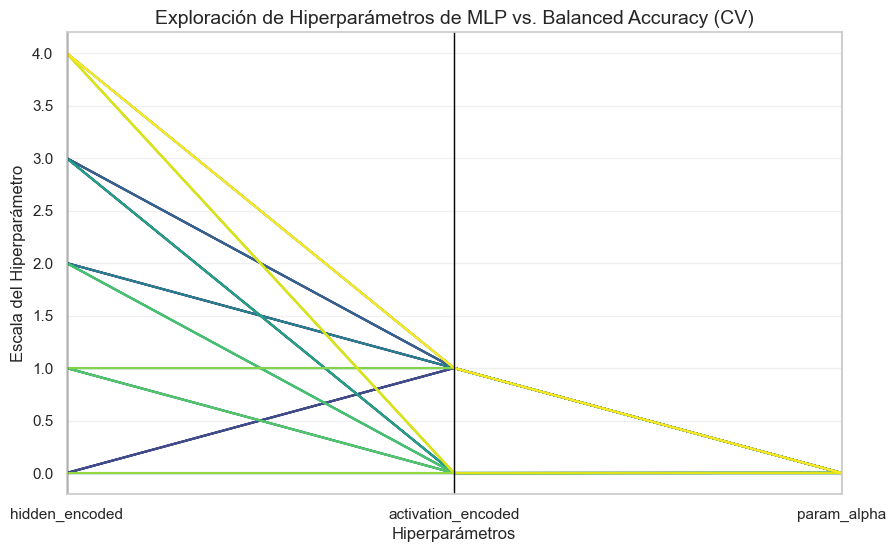

In [11]:
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)
results_mlp = results_mlp.rename(columns={'mean_test_score': 'Balanced_Accuracy_CV'})

# Seleccionar hiperparámetros relevantes
data_for_plot = results_mlp[[
    'param_hidden_layer_sizes',
    'param_activation',
    'param_alpha',
    'Balanced_Accuracy_CV'
]].copy()

# Codificar activation (categoría → número)
activation_mapping = {a: i for i, a in enumerate(data_for_plot['param_activation'].unique())}
data_for_plot['activation_encoded'] = data_for_plot['param_activation'].map(activation_mapping)

# Codificar hidden_layer_sizes (tupla → string → número)
data_for_plot['hidden_layer_sizes_str'] = data_for_plot['param_hidden_layer_sizes'].apply(
    lambda x: "-".join(map(str, x)) if isinstance(x, tuple) else str(x)
)
hidden_mapping = {h: i for i, h in enumerate(data_for_plot['hidden_layer_sizes_str'].unique())}
data_for_plot['hidden_encoded'] = data_for_plot['hidden_layer_sizes_str'].map(hidden_mapping)

# Ordenar por desempeño
data_for_plot = data_for_plot.sort_values(by='Balanced_Accuracy_CV', ascending=False)

plt.figure(figsize=(10, 6))

# Usar el score como el color
parallel_coordinates(
    data_for_plot,
    class_column='Balanced_Accuracy_CV',
    cols=['hidden_encoded', 'activation_encoded', 'param_alpha'],
    colormap='viridis'
)

plt.title('Exploración de Hiperparámetros de MLP vs. Balanced Accuracy (CV)', fontsize=14)
plt.xlabel('Hiperparámetros')
plt.ylabel('Escala del Hiperparámetro')
plt.grid(True, alpha=0.3)
plt.legend([], [], frameon=False)
plt.show()


In [12]:
print("EJEMPLO DE PREDICCIÓN CON PACIENTES REALES (Modelo MLP)")

n_ejemplos = 5
# 1. Seleccionar los índices aleatorios del conjunto de prueba
indices_aleatorios = np.random.choice(len(X_test), size=n_ejemplos, replace=False)

# 2. Preparar los datos
pacientes_ejemplo_original = X_test.iloc[indices_aleatorios]
pacientes_ejemplo_scaled = X_test_scaled[indices_aleatorios]  # X_test_scaled es un array de NumPy
realidad = y_test.iloc[indices_aleatorios]

print(f"\nAnalizando {n_ejemplos} pacientes del test set...\n")

# 3. Hacer predicciones
predicciones = best_model_mlp.predict(pacientes_ejemplo_scaled)
# MLP sí devuelve probabilidades con predict_proba
probabilidades = best_model_mlp.predict_proba(pacientes_ejemplo_scaled)

# 4. Mapeo de clases
clase_nombres = {0: 'No Diabetes', 1: 'Pre-diabetes', 2: 'Diabetes'}

# 5. Mostrar resultados paciente por paciente
for i, idx in enumerate(indices_aleatorios):
    print("="*70)
    print(f"PACIENTE #{idx}")
    print("="*70)
    
    print("\nCaracterísticas del paciente:")
    print("-"*70)
    for col_name in X_test.columns[:10]:
        valor = pacientes_ejemplo_original[col_name].iloc[i]
        print(f"   {col_name:25s}: {valor}")
    print(f"   ... (y {len(X_test.columns)-10} características más)")
    
    clase_real = int(realidad.iloc[i])
    print(f"\nDIAGNÓSTICO REAL:")
    print(f"   {clase_nombres[clase_real]}")
    
    clase_pred = int(predicciones[i])
    print(f"\nPREDICCIÓN DEL MODELO MLP:")
    print(f"   {clase_nombres[clase_pred]}")
    
    probs = probabilidades[i]
    print(f"\nCONFIANZA DE LA PREDICCIÓN (Probabilidades del modelo):")
    print("-"*70)
    for clase_num, prob in enumerate(probs):
        print(f"{clase_nombres[clase_num]:15s}: {prob:6.2%}")
    
    if clase_pred == clase_real:
        print(f"\nPREDICCIÓN CORRECTA ✅")
    else:
        print(f"\nPREDICCIÓN INCORRECTA ❌")
        print(f"   El modelo predijo '{clase_nombres[clase_pred]}'")
        print(f"   pero el diagnóstico real era '{clase_nombres[clase_real]}'")
    
    print()

print("RESUMEN DE LOS EJEMPLOS")

correctas = np.sum(predicciones == realidad.values)
print(f"\nPredicciones correctas: {correctas}/{n_ejemplos} ({correctas/n_ejemplos:.1%})")
print(f"Predicciones incorrectas: {n_ejemplos-correctas}/{n_ejemplos} ({(n_ejemplos-correctas)/n_ejemplos:.1%})")


EJEMPLO DE PREDICCIÓN CON PACIENTES REALES (Modelo MLP)

Analizando 5 pacientes del test set...

PACIENTE #2073

Características del paciente:
----------------------------------------------------------------------
   HighBP                   : 1.0
   HighChol                 : 1.0
   CholCheck                : 1.0
   BMI                      : 28.0
   Smoker                   : 0.0
   Stroke                   : 0.0
   HeartDiseaseorAttack     : 0.0
   PhysActivity             : 0.0
   Fruits                   : 1.0
   Veggies                  : 1.0
   ... (y 11 características más)

DIAGNÓSTICO REAL:
   No Diabetes

PREDICCIÓN DEL MODELO MLP:
   No Diabetes

CONFIANZA DE LA PREDICCIÓN (Probabilidades del modelo):
----------------------------------------------------------------------
No Diabetes    : 76.95%
Pre-diabetes   :  2.11%
Diabetes       : 20.94%

PREDICCIÓN CORRECTA ✅

PACIENTE #3084

Características del paciente:
----------------------------------------------------------------